Imports

In [4]:
import pandas as pd
import numpy as np
from IPython.display import Markdown, display
import math as math

import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

In [5]:
#from google.colab import drive
#drive.mount("/content/drive")

## Load dataset into the Dataframe

In [6]:
#df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
#df = pd.read_csv("/Users/dreama.wmy/Documents/McGill/INSY_695_ML/final_project/Train.csv")

url = 'https://raw.githubusercontent.com/McGill-MMA-EnterpriseAnalytics/Airline-Passenger-Satisfaction-Prediction/main/Data/train.csv'
pd.set_option('display.max_columns', None) # Show all the columns
df = pd.read_csv(url, index_col=0)


In [7]:
df.head(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


#### Check the column names

In [8]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

#### Check the data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

#### Count the number of unique values

In [10]:
df.nunique()

id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes              446
Arrival Delay in Minutes        

#### Descriptive Analysis

In [11]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


#### Cleaning column names

In [12]:
#Cleaning column names
df.columns = [c.replace(' ', '_') for c in df.columns]
df.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

## Data Exploration

#### Identify categorical columns and numerical columns

In [13]:
cat_var = ['Gender', 'Customer_Type', 'Type_of_Travel', 'Class']
num_var = ['Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction']

In [14]:
def list_column_values(df, number_of_values, print_all):
    display(Markdown('**Results:**' ))
    for col in df.columns[0:]:
        if df[col].nunique() <= number_of_values:
            print(f"{col.ljust(25)}" +  ' ==> ' + str(df[col].sort_values().unique().tolist()) )
        else:  
            if print_all=='True':
               print(f"{col.ljust(25)}" + ' ==> more than ' + str(number_of_values) + ' values')

In [15]:
list_column_values(df,3,'False')

**Results:**

Gender                    ==> ['Female', 'Male']
Customer_Type             ==> ['Loyal Customer', 'disloyal Customer']
Type_of_Travel            ==> ['Business travel', 'Personal Travel']
Class                     ==> ['Business', 'Eco', 'Eco Plus']
satisfaction              ==> ['neutral or dissatisfied', 'satisfied']


In [16]:
list_column_values(df,15,'True')

**Results:**

id                        ==> more than 15 values
Gender                    ==> ['Female', 'Male']
Customer_Type             ==> ['Loyal Customer', 'disloyal Customer']
Age                       ==> more than 15 values
Type_of_Travel            ==> ['Business travel', 'Personal Travel']
Class                     ==> ['Business', 'Eco', 'Eco Plus']
Flight_Distance           ==> more than 15 values
Inflight_wifi_service     ==> [0, 1, 2, 3, 4, 5]
Departure/Arrival_time_convenient ==> [0, 1, 2, 3, 4, 5]
Ease_of_Online_booking    ==> [0, 1, 2, 3, 4, 5]
Gate_location             ==> [0, 1, 2, 3, 4, 5]
Food_and_drink            ==> [0, 1, 2, 3, 4, 5]
Online_boarding           ==> [0, 1, 2, 3, 4, 5]
Seat_comfort              ==> [0, 1, 2, 3, 4, 5]
Inflight_entertainment    ==> [0, 1, 2, 3, 4, 5]
On-board_service          ==> [0, 1, 2, 3, 4, 5]
Leg_room_service          ==> [0, 1, 2, 3, 4, 5]
Baggage_handling          ==> [1, 2, 3, 4, 5]
Checkin_service           ==> [0, 1, 2, 3, 4, 5]
Infligh

#### Check missing values

In [17]:
df.isnull().sum().sort_values(ascending=False)
#Null values found in Arrival_Delay_in_minues column

Arrival_Delay_in_Minutes             310
id                                     0
Gender                                 0
Departure_Delay_in_Minutes             0
Cleanliness                            0
Inflight_service                       0
Checkin_service                        0
Baggage_handling                       0
Leg_room_service                       0
On-board_service                       0
Inflight_entertainment                 0
Seat_comfort                           0
Online_boarding                        0
Food_and_drink                         0
Gate_location                          0
Ease_of_Online_booking                 0
Departure/Arrival_time_convenient      0
Inflight_wifi_service                  0
Flight_Distance                        0
Class                                  0
Type_of_Travel                         0
Age                                    0
Customer_Type                          0
satisfaction                           0
dtype: int64

## Exploring Target Variable

In [18]:
#Target variable
unique_values = df['satisfaction'].unique()
unique_values

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [19]:
df['satisfaction'] = df['satisfaction'].replace({'satisfied': 1, 'neutral or dissatisfied': 0})

In [20]:
df['satisfaction'].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

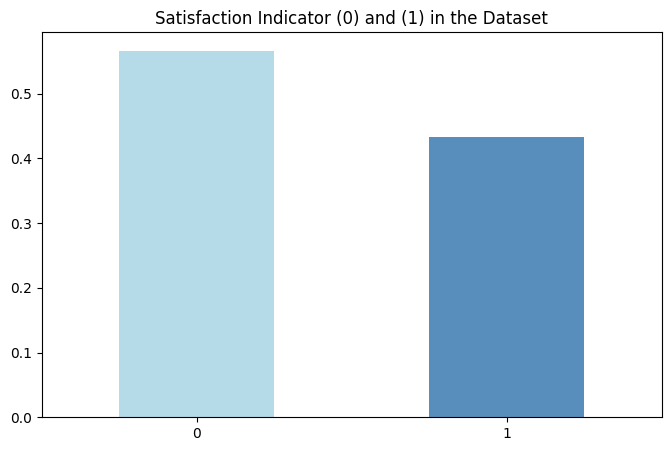

In [21]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize = (8,5))
df.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['lightblue','steelblue'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

## Exploring numerical variables

In [22]:
def plot_numerical_columns(df):
    df = df[df.select_dtypes([np.int64,np.float64]).columns]
    lcols = 2
    lrows = math.ceil(len(df.columns)/lcols)
    plt.figure(figsize=(20,20))
    plt.subplots_adjust(wspace=0.2, hspace=0.5) 
    for i, column in enumerate(df.columns):
        plt.subplot(lrows,lcols,i+1)
        sns.distplot(df[column])

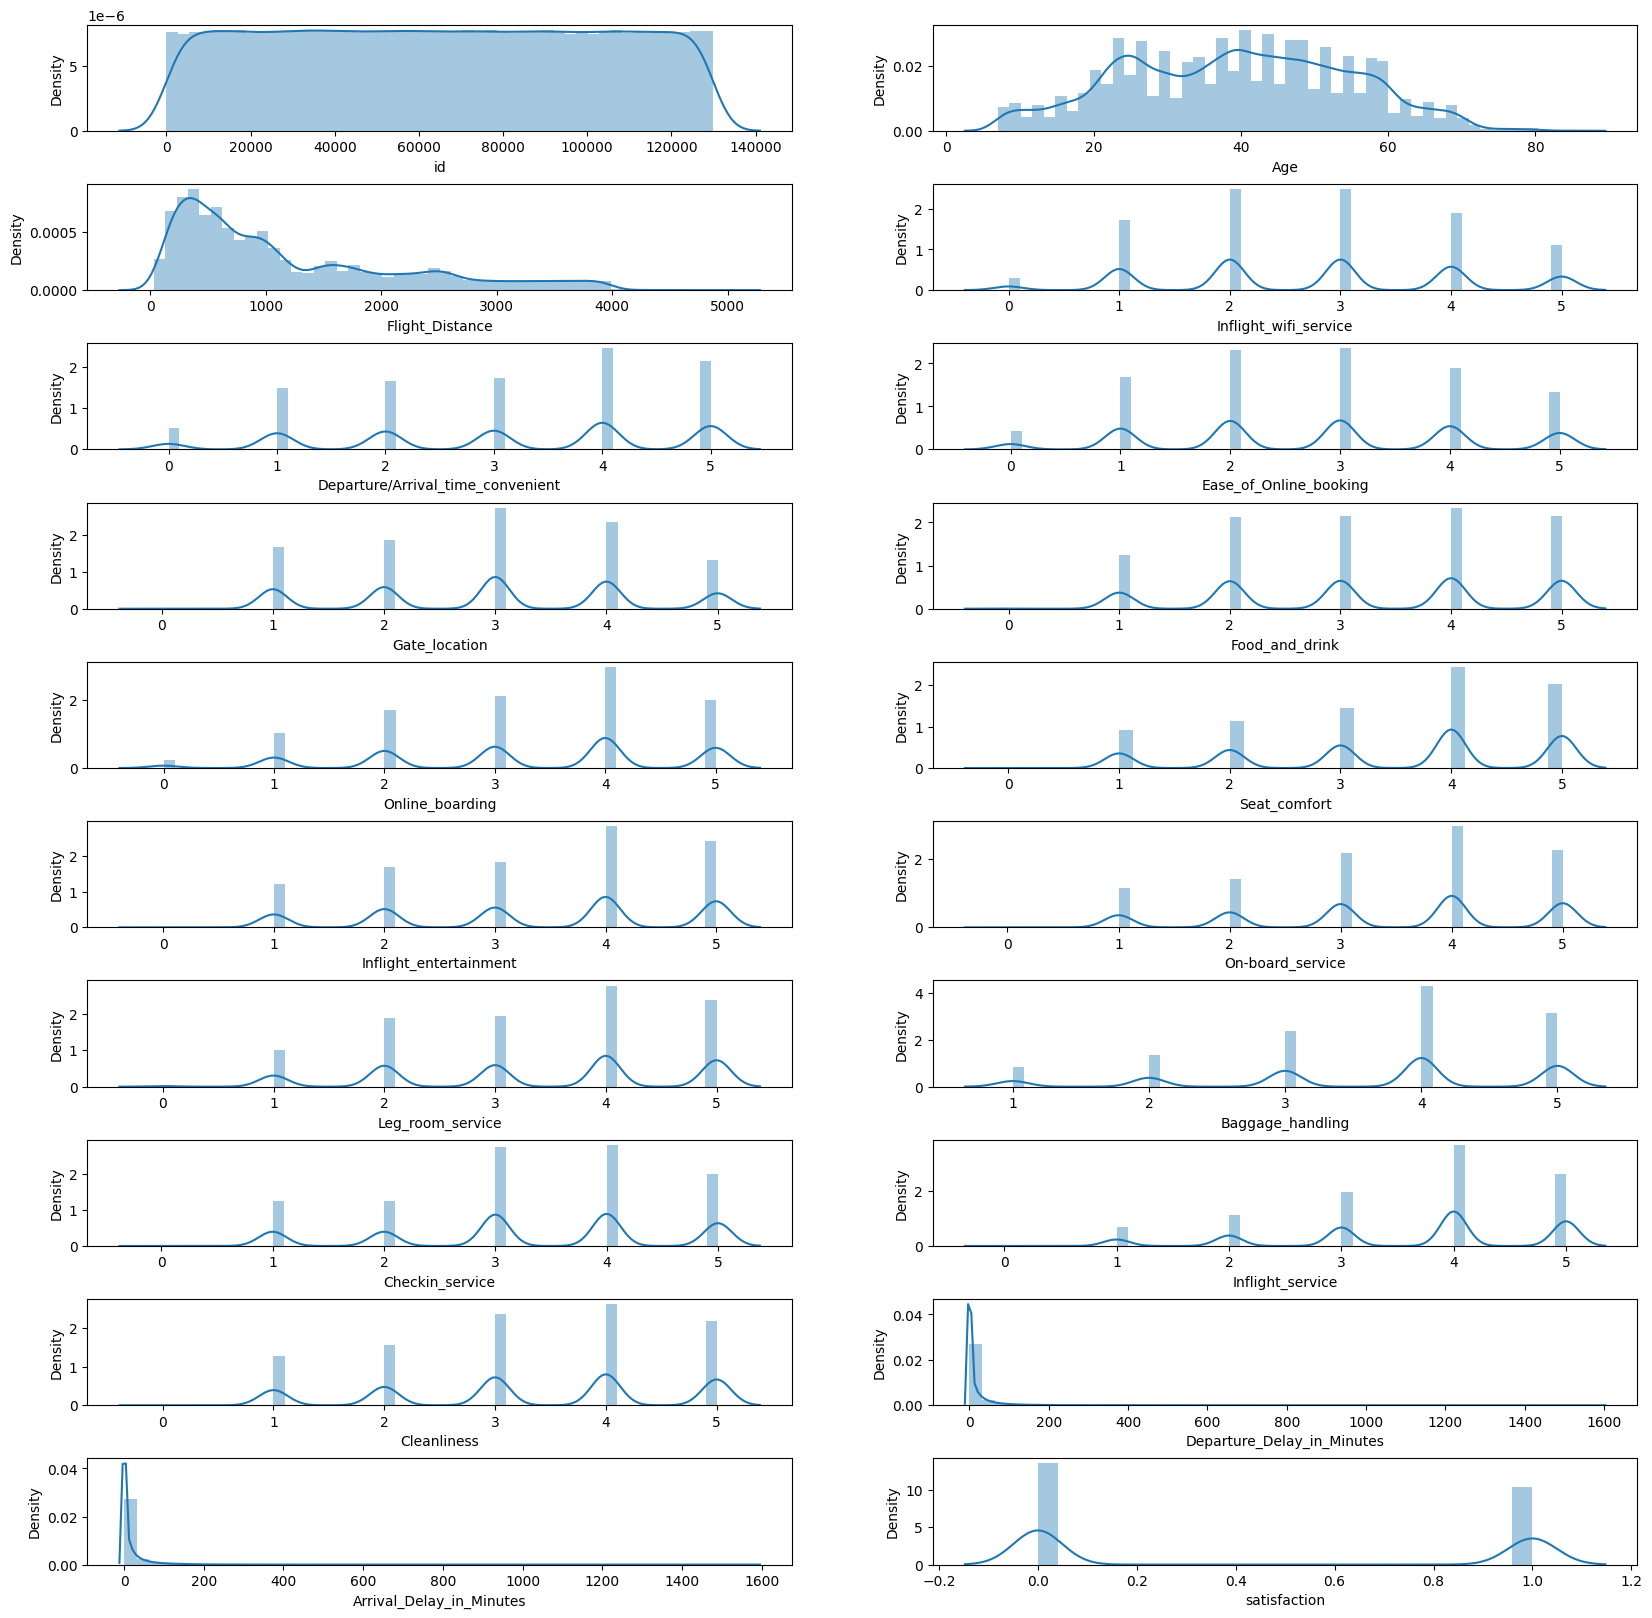

In [23]:
plot_numerical_columns(df)

## Exploring categorical variables

In [24]:
for c in cat_var:
    print("{} \n".format(df[c].value_counts()))

Female    52727
Male      51177
Name: Gender, dtype: int64 

Loyal Customer       84923
disloyal Customer    18981
Name: Customer_Type, dtype: int64 

Business travel    71655
Personal Travel    32249
Name: Type_of_Travel, dtype: int64 

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64 



In [25]:
def plot_with_sat(var):
    plt.subplots(figsize = (8,5))
    u = sns.countplot(x = var, hue = 'satisfaction', palette = "Blues", data = df)


def level_plot(var):
    fig, axarr= plt.subplots(1, 2, figsize=(14, 5))
    sns.countplot(x = var, hue = 'satisfaction', palette = "Blues", data = df, ax = axarr[0])
    table = pd.crosstab(df['satisfaction'], df[var])
    sns.heatmap(table, cmap='Blues', ax = axarr[1])

In [26]:
# create formula to calcuate the dissatisfied rate based on a variable
# method modified from https://www.youtube.com/watch?v=ICxUS4MGioE&t=1242s. 
#credit to Data Science With Chris. 
def table (var, highlight = True): 
    
    df_pivot = pd.pivot_table(
        df[[ 'id',var, "satisfaction"]],
        index = [var], 
        columns = ["satisfaction"], 
        aggfunc = "count", 
        fill_value =0).reset_index()
    
    df_pivot.columns = [var, 0, 1]
    
    df_pivot["Total"] = df_pivot[1]+df_pivot[0]
    df_pivot["Dissatisfied Rate"] = round(df_pivot[0]/df_pivot["Total"]*100,2).astype(str)


    if highlight == True: 
        df_pivot = df_pivot.style.highlight_max(subset = "Dissatisfied Rate", color = "lightblue" )
    else: 
        df_pivot = df_pivot
        
    return df_pivot

### Gender

In [27]:
table("Gender")

,Gender,0,1,Total,Dissatisfied Rate
0,Female,30193,22534,52727,57.26
1,Male,28686,22491,51177,56.05


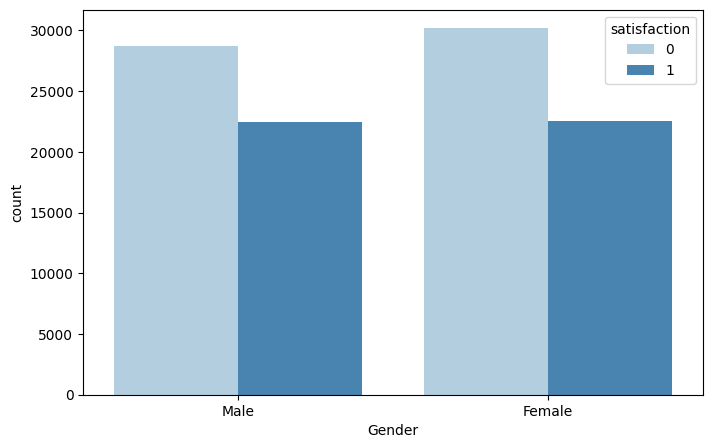

In [28]:
plot_with_sat('Gender')

### Age

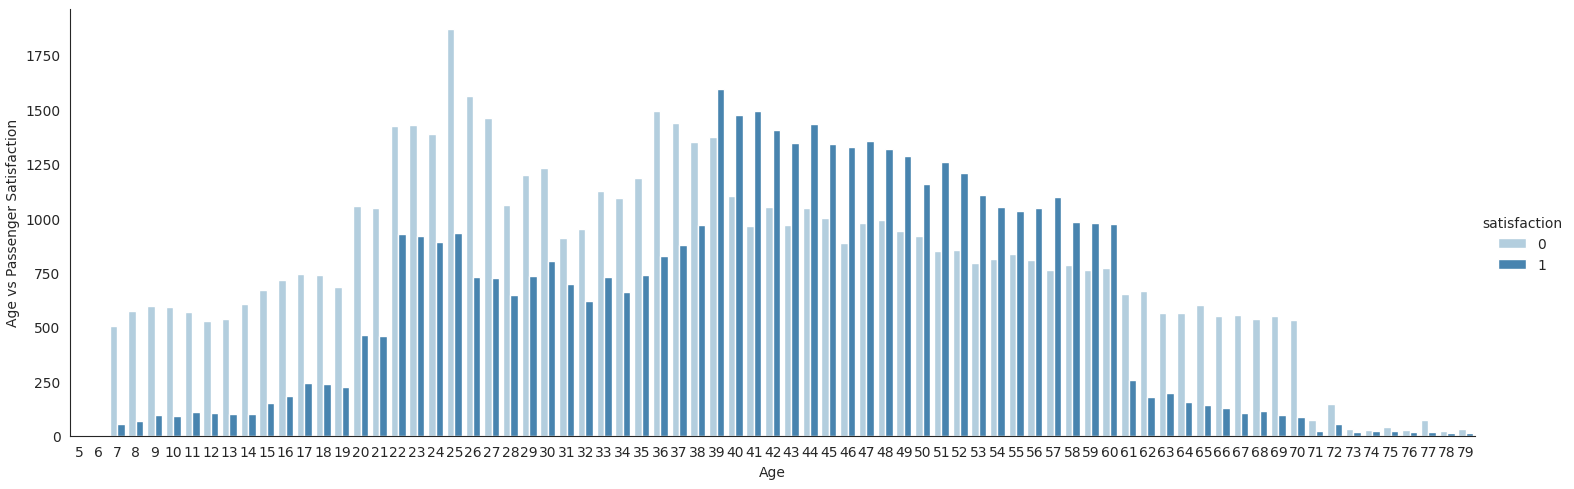

In [29]:
with sns.axes_style('white'):
    g = sns.catplot(data=df, x="Age", aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80),palette = "Blues")
    g.set_ylabels('Age vs Passenger Satisfaction')

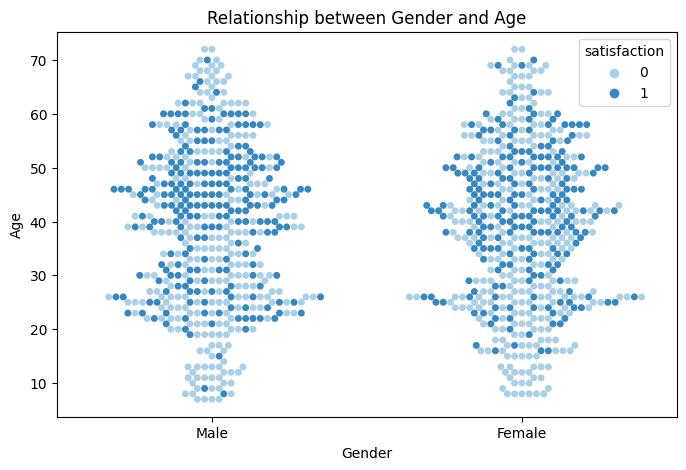

In [30]:
plt.subplots(figsize = (8,5))
sns.swarmplot(x="Gender", y="Age",hue="satisfaction", data=df.head(1000), palette = "Blues")
plt.title('Relationship between Gender and Age')
plt.show()

### Customer Type

In [31]:
table("Customer_Type")

,Customer_Type,0,1,Total,Dissatisfied Rate
0,Loyal Customer,44390,40533,84923,52.27
1,disloyal Customer,14489,4492,18981,76.33


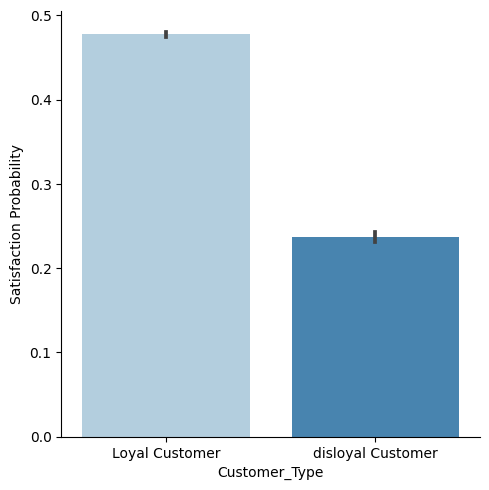

In [32]:
import seaborn as sns
#g=sns.factorplot(x="Customer_Type",y="satisfaction",data=df,kind="bar",size=6,palette = "Blues")
g=sns.catplot(x="Customer_Type",y="satisfaction",data=df,kind="bar",palette = "Blues")
g.set_ylabels("Satisfaction Probability")
plt.show()

### Type of Travel

In [33]:
table('Type_of_Travel')

,Type_of_Travel,0,1,Total,Dissatisfied Rate
0,Business travel,29909,41746,71655,41.74
1,Personal Travel,28970,3279,32249,89.83


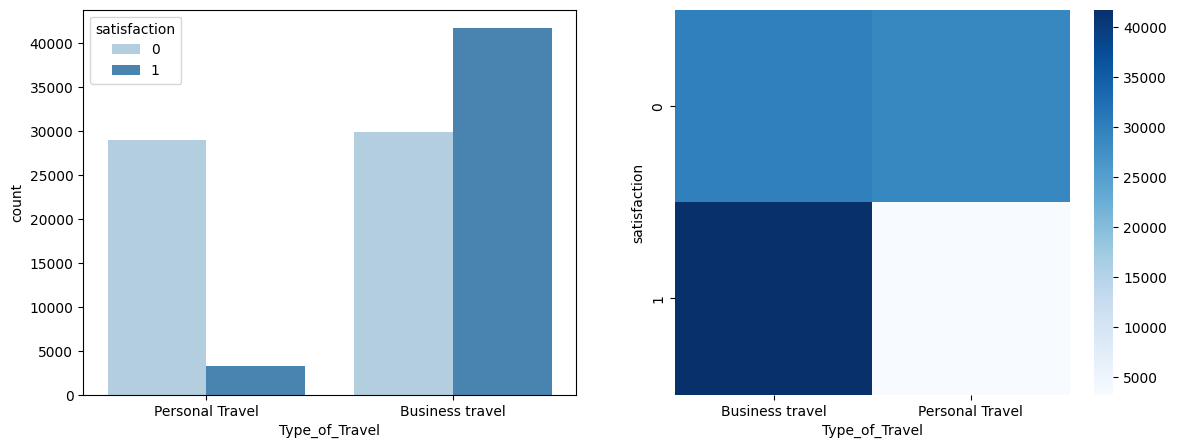

In [34]:
level_plot('Type_of_Travel')

### Class

In [35]:
table('Class')

,Class,0,1,Total,Dissatisfied Rate
0,Business,15185,34480,49665,30.57
1,Eco,38044,8701,46745,81.39
2,Eco Plus,5650,1844,7494,75.39


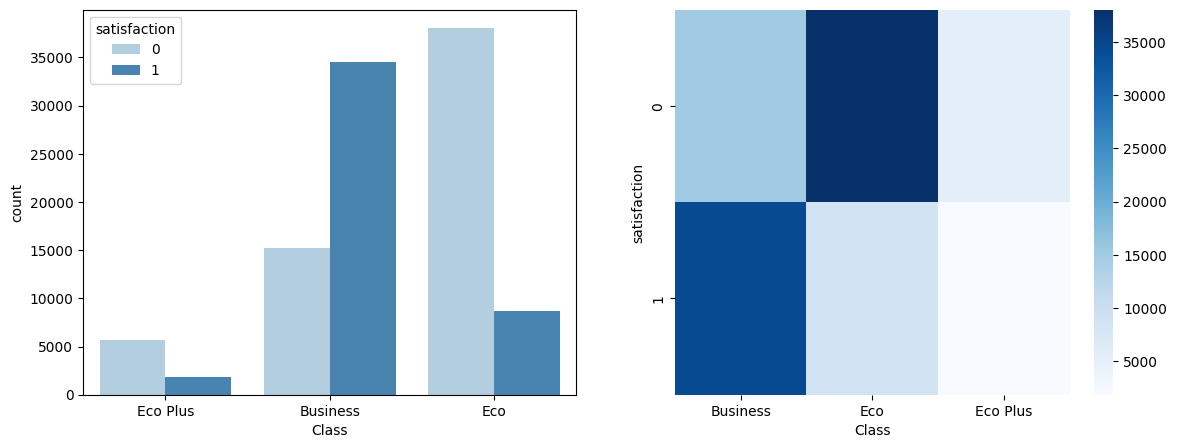

In [36]:
level_plot('Class')

### Flight Distance

Text(0.5, 1.0, 'Flight Distance VS Satisfaction')

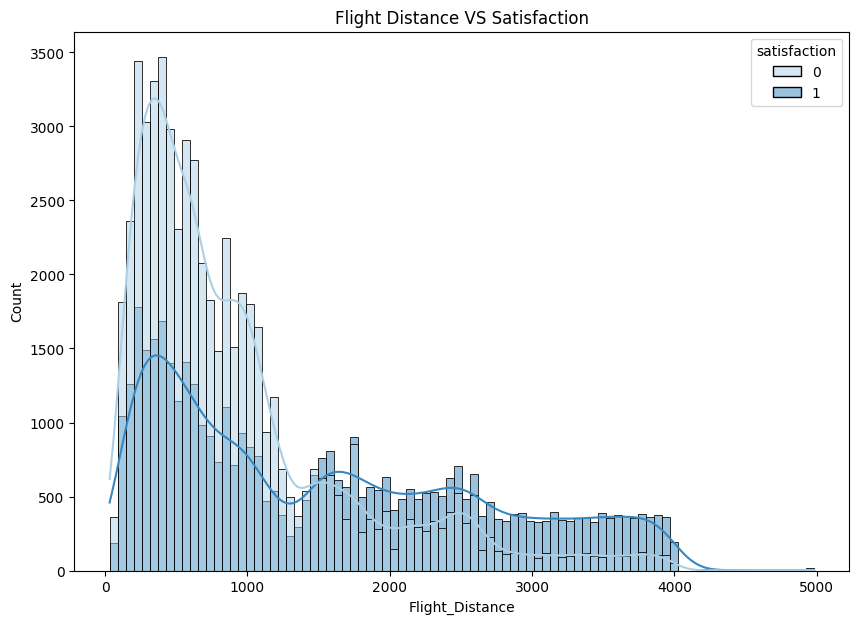

In [37]:
plt.subplots(figsize = (10,7))
sns.histplot(x='Flight_Distance',hue="satisfaction",data=df,kde=True,palette="Blues")
plt.title("Flight Distance VS Satisfaction")

### Inflight WIFI Service

In [38]:
table('Inflight_wifi_service')

,Inflight_wifi_service,0,1,Total,Dissatisfied Rate
0,0,8,3095,3103,0.26
1,1,12034,5806,17840,67.46
2,2,19407,6423,25830,75.13
3,3,19386,6482,25868,74.94
4,4,7938,11856,19794,40.1
5,5,106,11363,11469,0.92


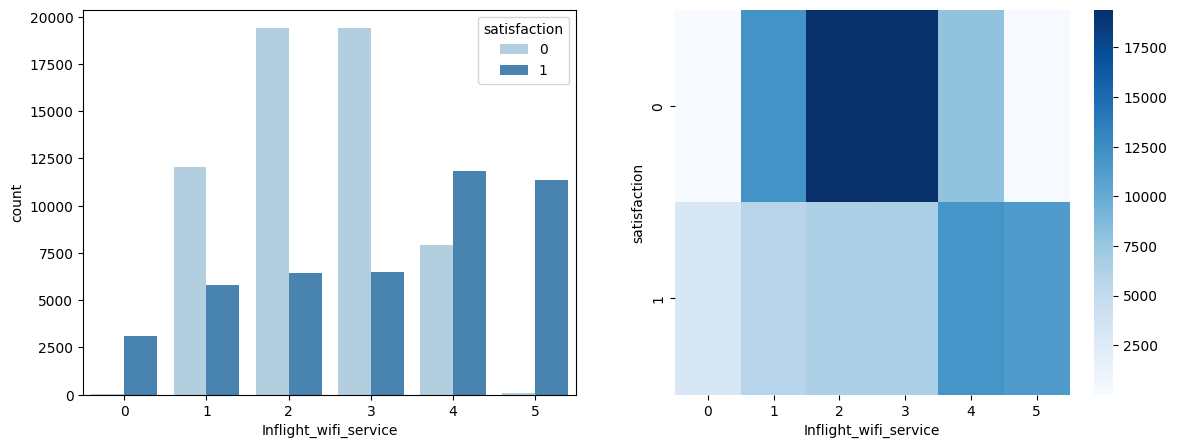

In [39]:
level_plot('Inflight_wifi_service')

### Departure/Arrival time convenient

In [40]:
table('Departure/Arrival_time_convenient')

,Departure/Arrival_time_convenient,0,1,Total,Dissatisfied Rate
0,0,2780,2520,5300,52.45
1,1,7957,7541,15498,51.34
2,2,9534,7657,17191,55.46
3,3,10093,7873,17966,56.18
4,4,15640,9906,25546,61.22
5,5,12875,9528,22403,57.47


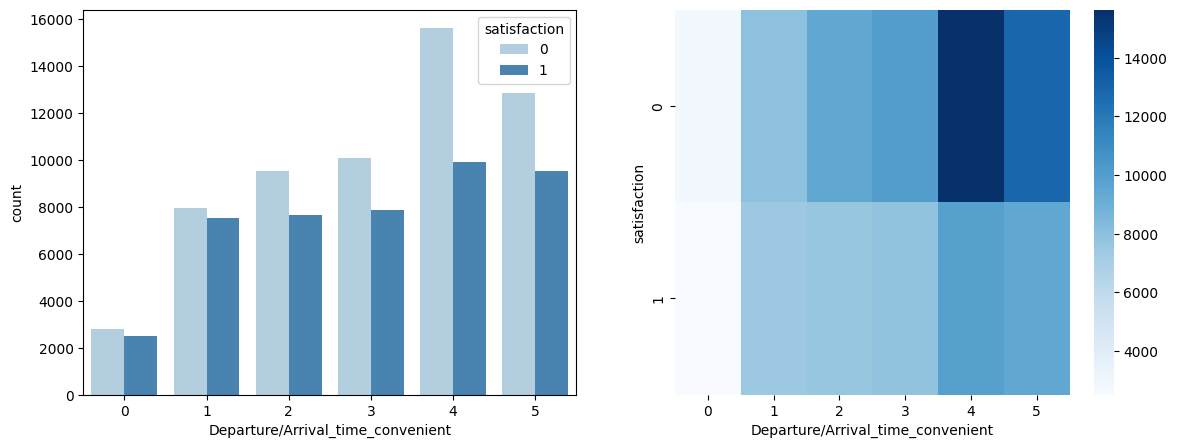

In [41]:
level_plot('Departure/Arrival_time_convenient')

### Ease of Online Booking

In [42]:
table('Ease_of_Online_booking')

,Ease_of_Online_booking,0,1,Total,Dissatisfied Rate
0,0,1507,2980,4487,33.59
1,1,10935,6590,17525,62.4
2,2,16720,7301,24021,69.61
3,3,16912,7537,24449,69.17
4,4,9180,10391,19571,46.91
5,5,3625,10226,13851,26.17


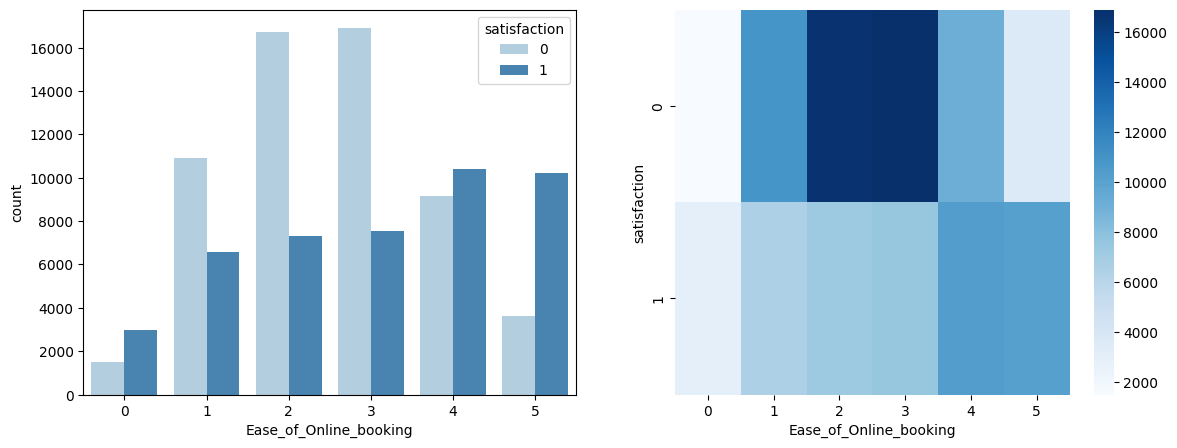

In [43]:
level_plot('Ease_of_Online_booking')

### Gate Location

In [44]:
table('Gate_location')

,Gate_location,0,1,Total,Dissatisfied Rate
0,0,0,1,1,0.0
1,1,8859,8703,17562,50.44
2,2,10494,8965,19459,53.93
3,3,18655,9922,28577,65.28
4,4,14936,9490,24426,61.15
5,5,5935,7944,13879,42.76


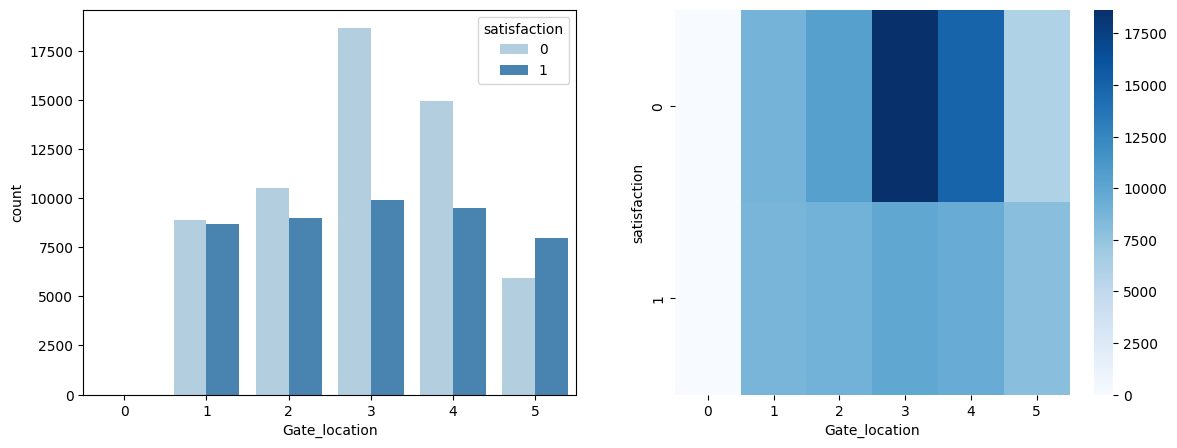

In [45]:
level_plot('Gate_location')

### Food and Drink

In [46]:
table('Food_and_drink')

,Food_and_drink,0,1,Total,Dissatisfied Rate
0,0,57,50,107,53.27
1,1,10269,2568,12837,80.0
2,2,13458,8530,21988,61.21
3,3,13461,8839,22300,60.36
4,4,11571,12788,24359,47.5
5,5,10063,12250,22313,45.1


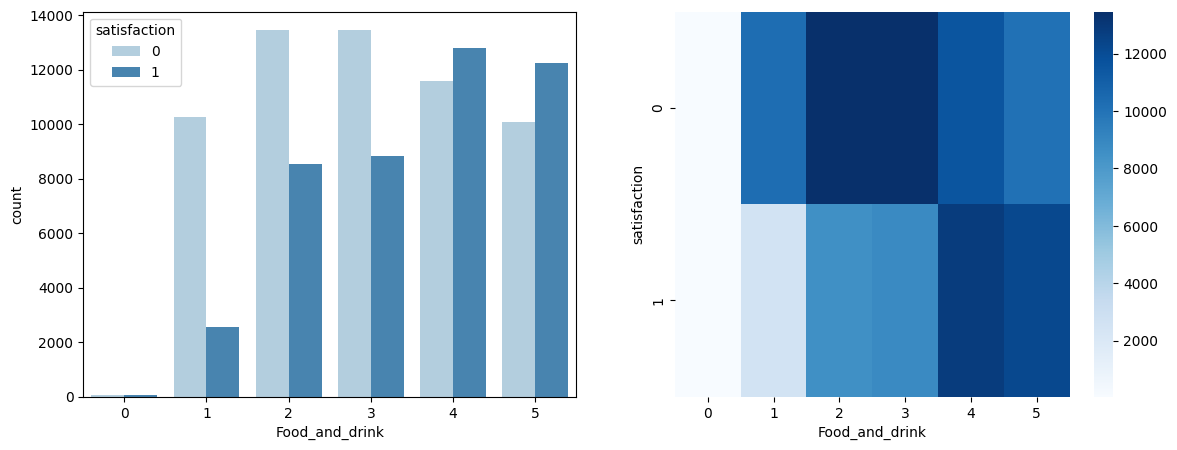

In [47]:
level_plot("Food_and_drink")

### Online Boarding

In [48]:
table('Online_boarding')

,Online_boarding,0,1,Total,Dissatisfied Rate
0,0,1077,1351,2428,44.36
1,1,9219,1473,10692,86.22
2,2,15486,2019,17505,88.47
3,3,18845,2959,21804,86.43
4,4,11596,19166,30762,37.7
5,5,2656,18057,20713,12.82


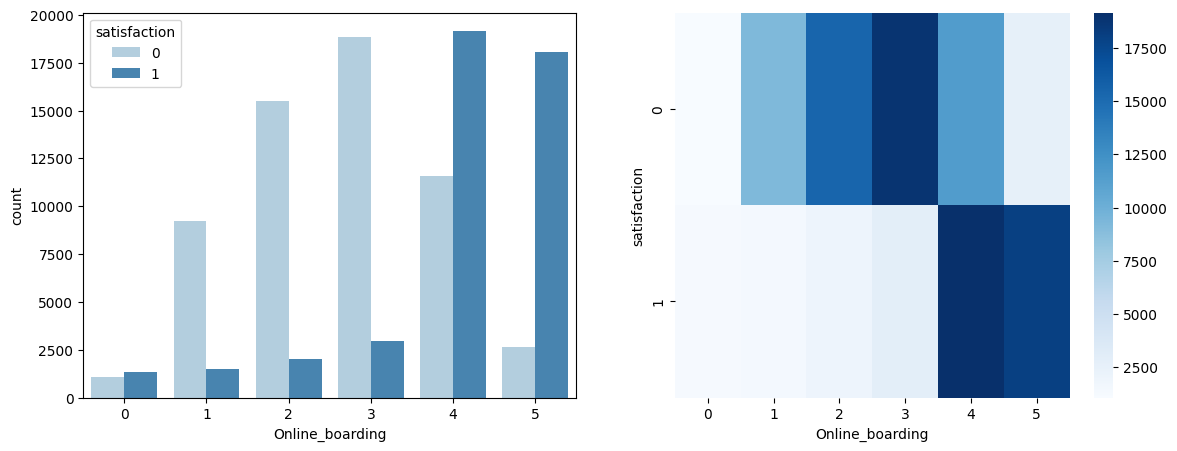

In [49]:
level_plot('Online_boarding')

### Seat comfort

In [50]:
table('Seat_comfort')

,Seat_comfort,0,1,Total,Dissatisfied Rate
0,0,1,0,1,100.0
1,1,9380,2695,12075,77.68
2,2,11558,3339,14897,77.59
3,3,14741,3955,18696,78.85
4,4,13940,17825,31765,43.88
5,5,9259,17211,26470,34.98


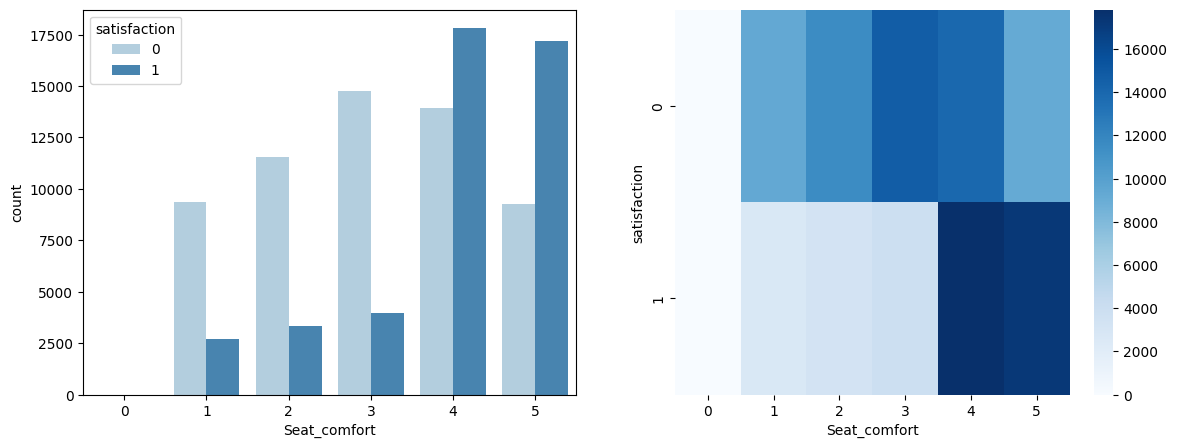

In [51]:
level_plot('Seat_comfort')

### Inflight Entertainment

In [52]:
table("Inflight_entertainment")

,Inflight_entertainment,0,1,Total,Dissatisfied Rate
0,0,14,0,14,100.0
1,1,10733,1745,12478,86.02
2,2,13875,3762,17637,78.67
3,3,13970,5169,19139,72.99
4,4,11423,18000,29423,38.82
5,5,8864,16349,25213,35.16


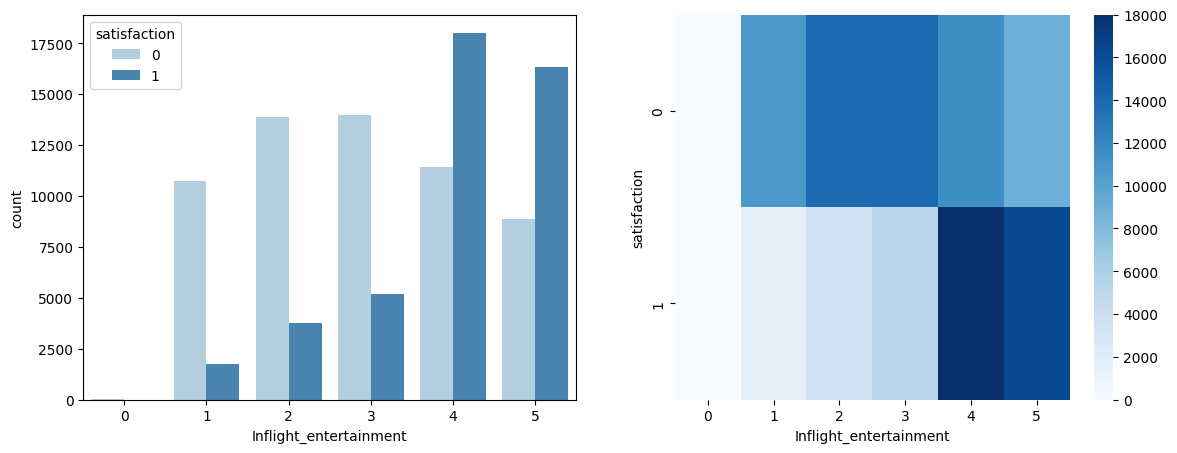

In [53]:
level_plot("Inflight_entertainment")

### On Board Service

In [54]:
table('On-board_service')

,On-board_service,0,1,Total,Dissatisfied Rate
0,0,3,0,3,100.0
1,1,9572,2300,11872,80.63
2,2,10927,3754,14681,74.43
3,3,15625,7208,22833,68.43
4,4,14296,16571,30867,46.31
5,5,8456,15192,23648,35.76


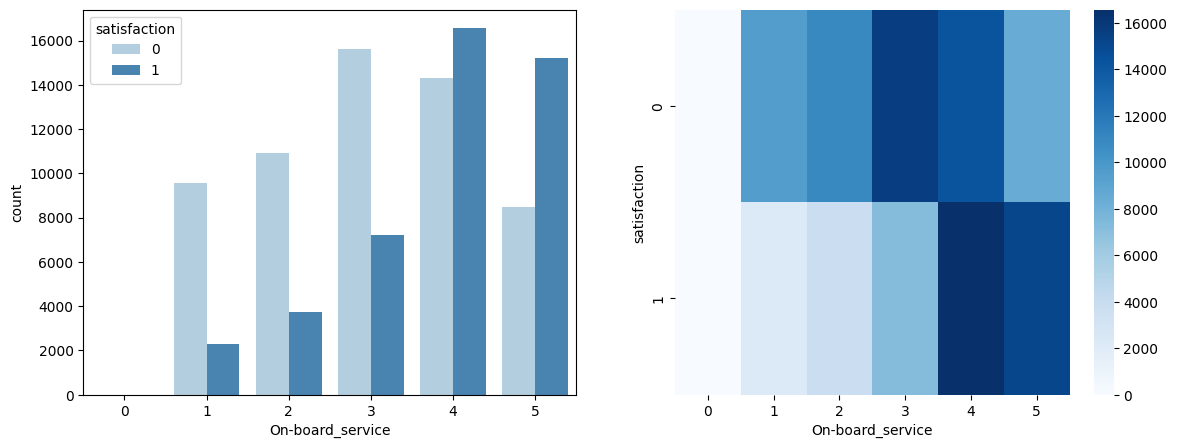

In [55]:
level_plot('On-board_service')

### Leg_room_service

In [56]:
table("Leg_room_service")

,Leg_room_service,0,1,Total,Dissatisfied Rate
0,0,306,166,472,64.83
1,1,8253,2100,10353,79.72
2,2,14162,5363,19525,72.53
3,3,14623,5475,20098,72.76
4,4,12025,16764,28789,41.77
5,5,9510,15157,24667,38.55


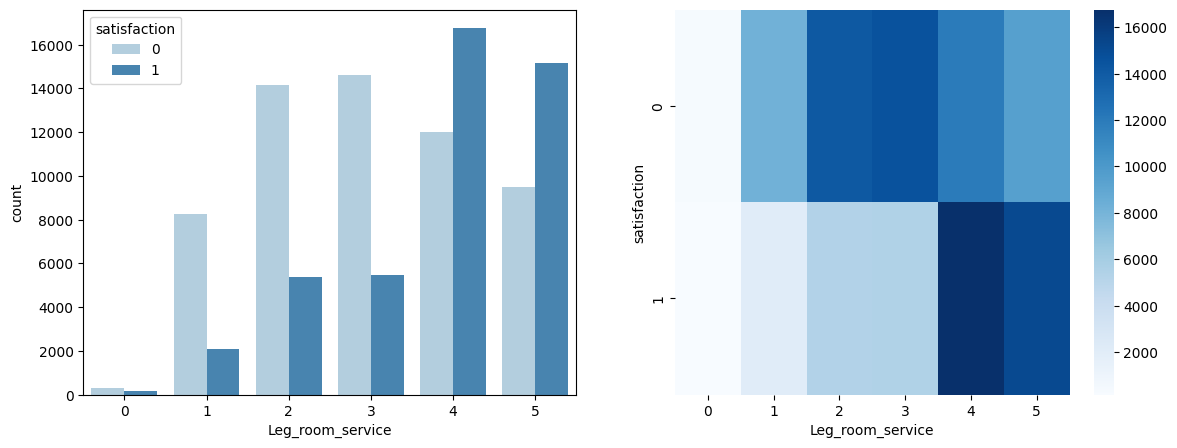

In [57]:
level_plot("Leg_room_service")

### Baggage_handling

In [58]:
table("Baggage_handling")

,Baggage_handling,0,1,Total,Dissatisfied Rate
0,1,5083,2154,7237,70.24
1,2,8117,3404,11521,70.45
2,3,15766,4866,20632,76.42
3,4,19405,17978,37383,51.91
4,5,10508,16623,27131,38.73


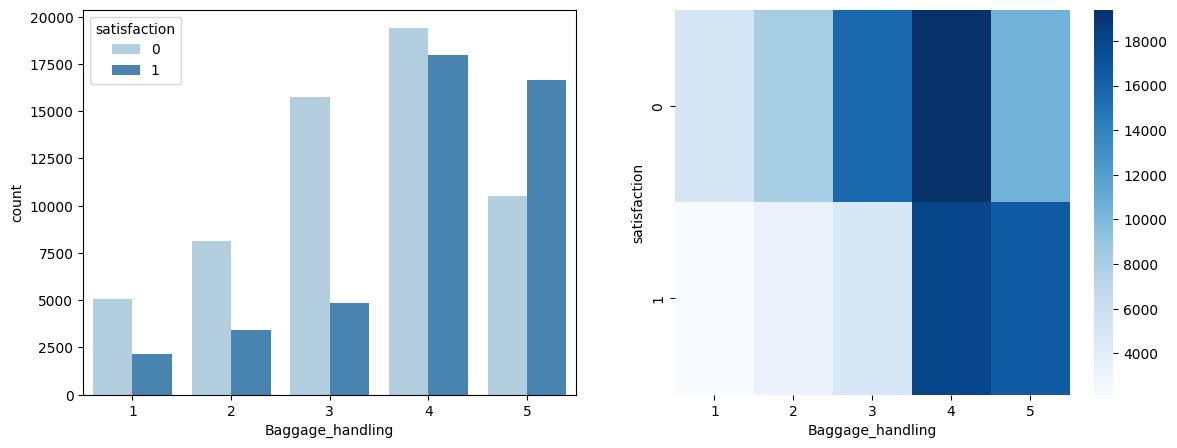

In [59]:
level_plot("Baggage_handling")

### Checkin_service

In [60]:
table('Checkin_service')

,Checkin_service,0,1,Total,Dissatisfied Rate
0,0,1,0,1,100.0
1,1,9806,3084,12890,76.07
2,2,9640,3253,12893,74.77
3,3,15694,12752,28446,55.17
4,4,15692,13363,29055,54.01
5,5,8046,12573,20619,39.02


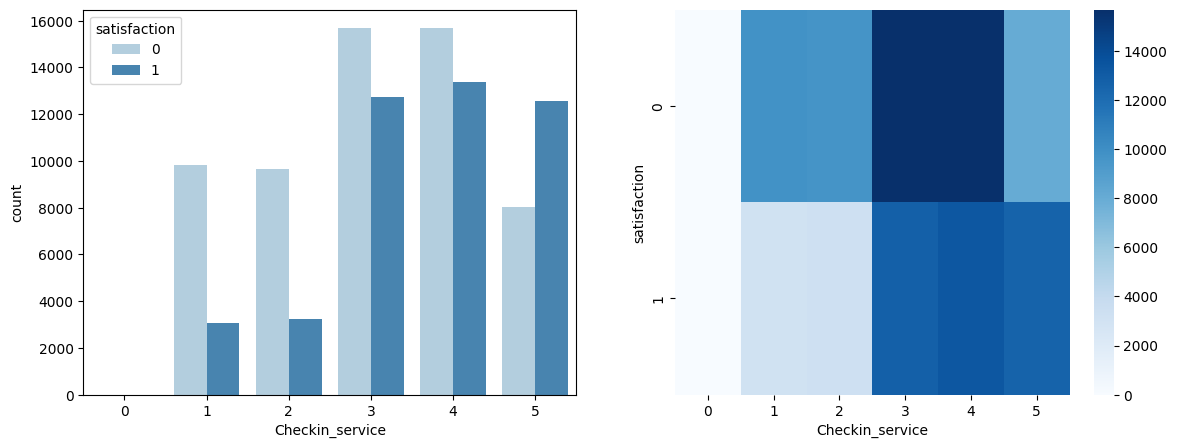

In [61]:
level_plot('Checkin_service')

### Inflight_service

In [62]:
table('Inflight_service')

,Inflight_service,0,1,Total,Dissatisfied Rate
0,0,3,0,3,100.0
1,1,5030,2054,7084,71.01
2,2,8006,3451,11457,69.88
3,3,15448,4851,20299,76.1
4,4,19816,18129,37945,52.22
5,5,10576,16540,27116,39.0


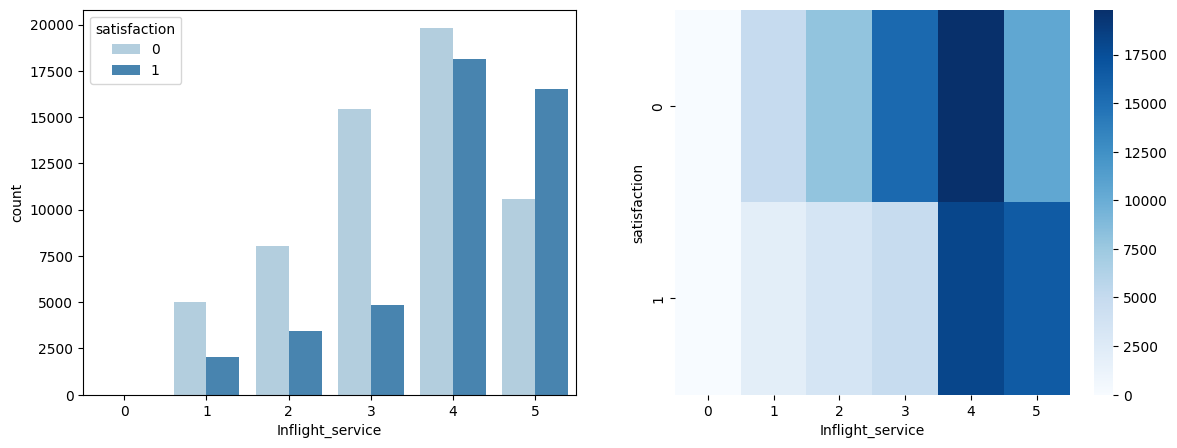

In [63]:
level_plot('Inflight_service')

### Cleanliness

In [64]:
table('Cleanliness')

,Cleanliness,0,1,Total,Dissatisfied Rate
0,0,12,0,12,100.0
1,1,10705,2613,13318,80.38
2,2,12696,3436,16132,78.7
3,3,13961,10613,24574,56.81
4,4,12629,14550,27179,46.47
5,5,8876,13813,22689,39.12


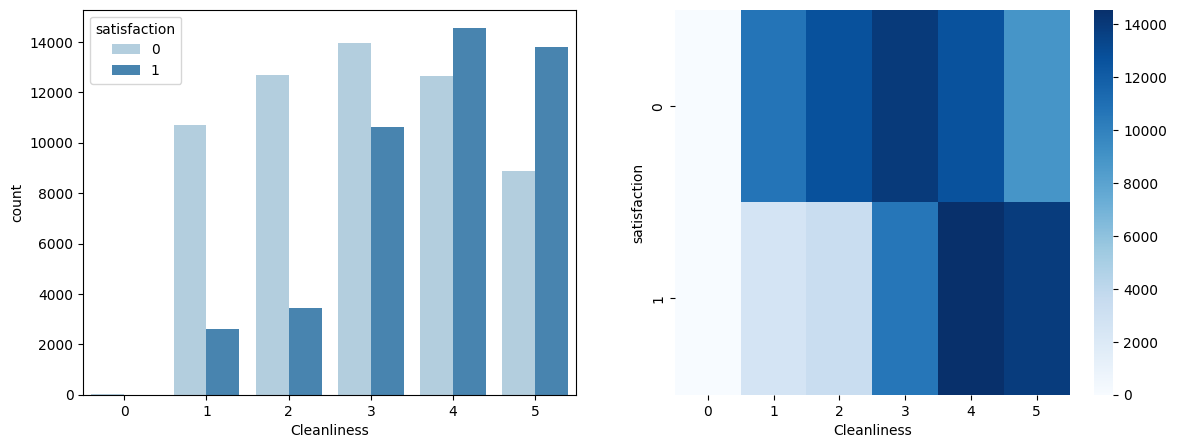

In [65]:
level_plot('Cleanliness')

### Departure_Delay_in_Minutes

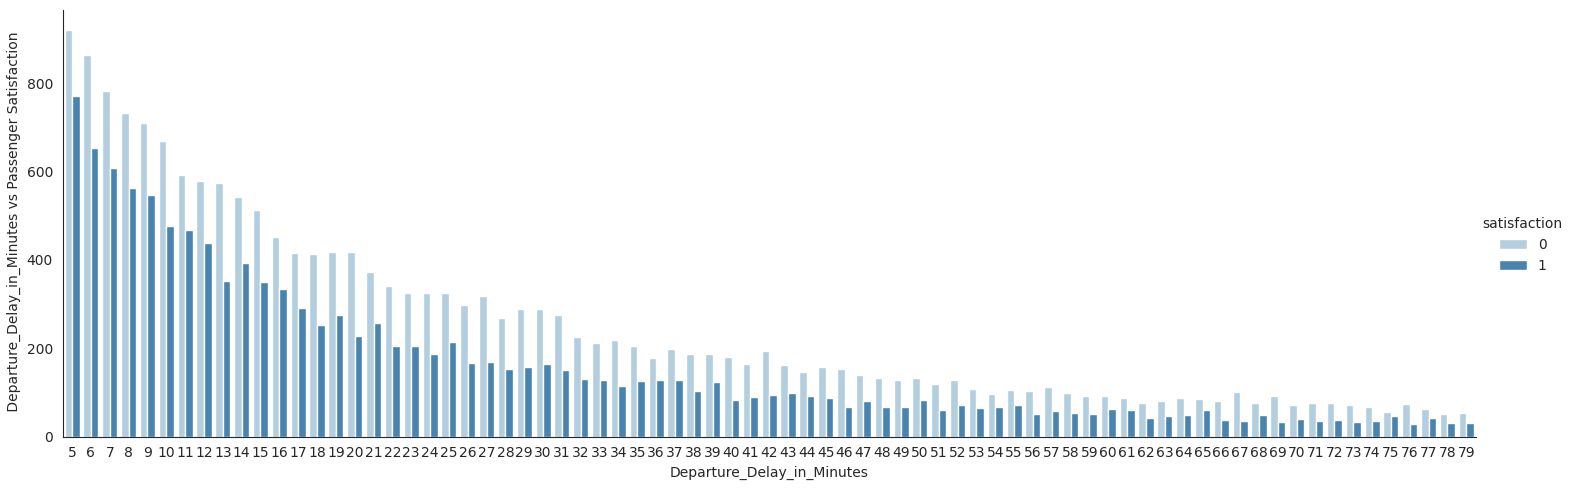

In [66]:
with sns.axes_style('white'):
    g = sns.catplot(data=df,  x="Departure_Delay_in_Minutes", aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80),palette = "Blues")
    g.set_ylabels(' Departure_Delay_in_Minutes vs Passenger Satisfaction')

### Arrival_Delay_in_Minutes

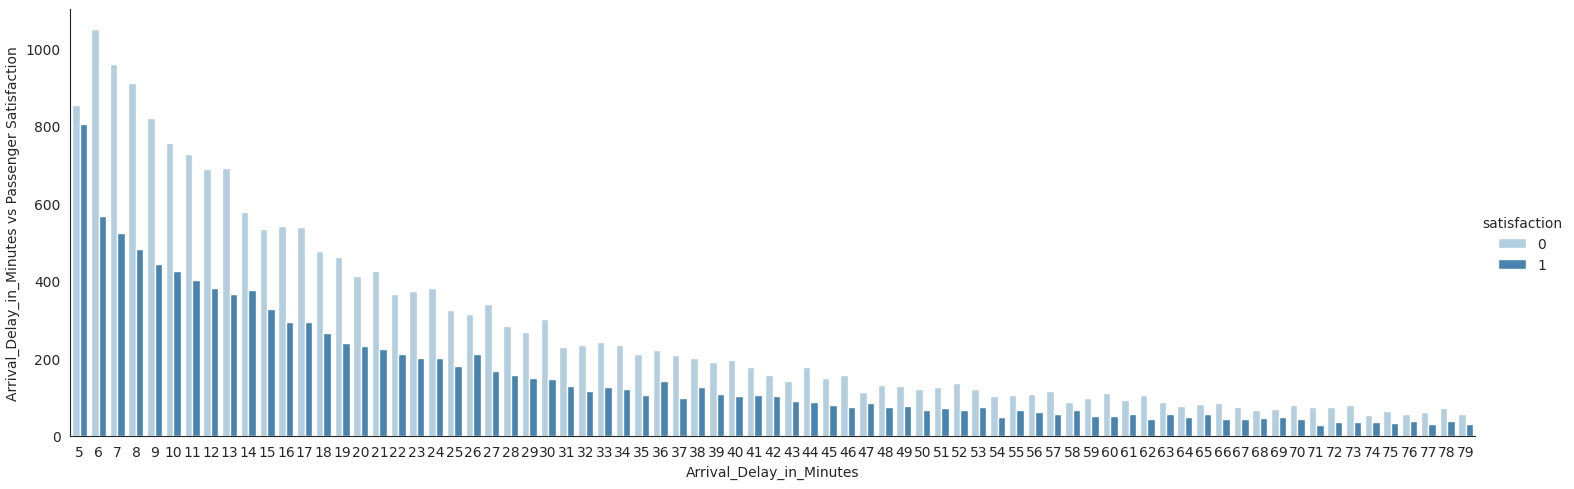

In [67]:
with sns.axes_style('white'):
    g = sns.catplot(data=df,  x="Arrival_Delay_in_Minutes", aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80),palette = "Blues")
    g.set_ylabels('Arrival_Delay_in_Minutes vs Passenger Satisfaction')

### Relationships between categorical variables

<AxesSubplot: xlabel='Age', ylabel='Count'>

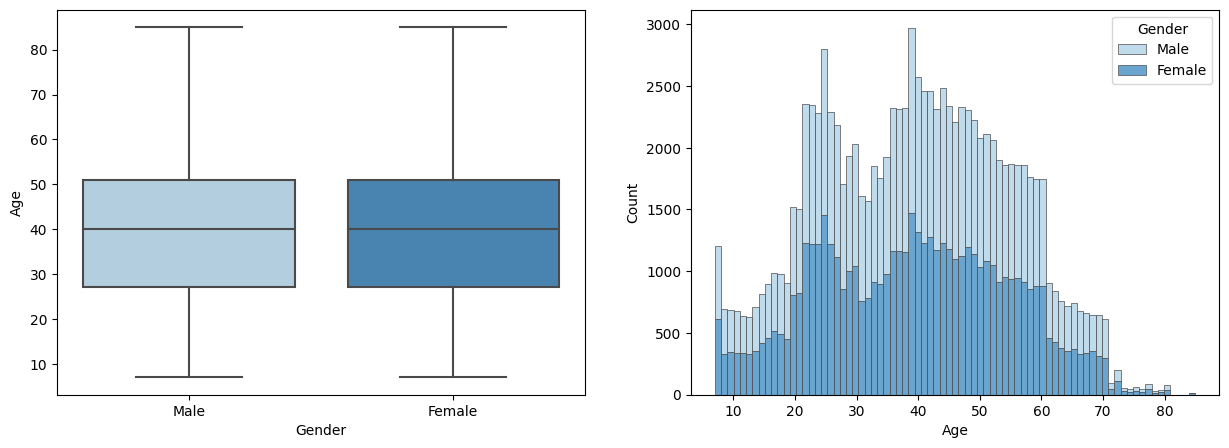

In [68]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Gender", y = "Age", palette = "Blues", data = df, ax = ax[0])
sns.histplot(df, x = "Age", hue = "Gender", multiple = "stack", palette = "Blues", edgecolor = ".3", linewidth = .5, ax = ax[1])

<AxesSubplot: xlabel='Age', ylabel='Count'>

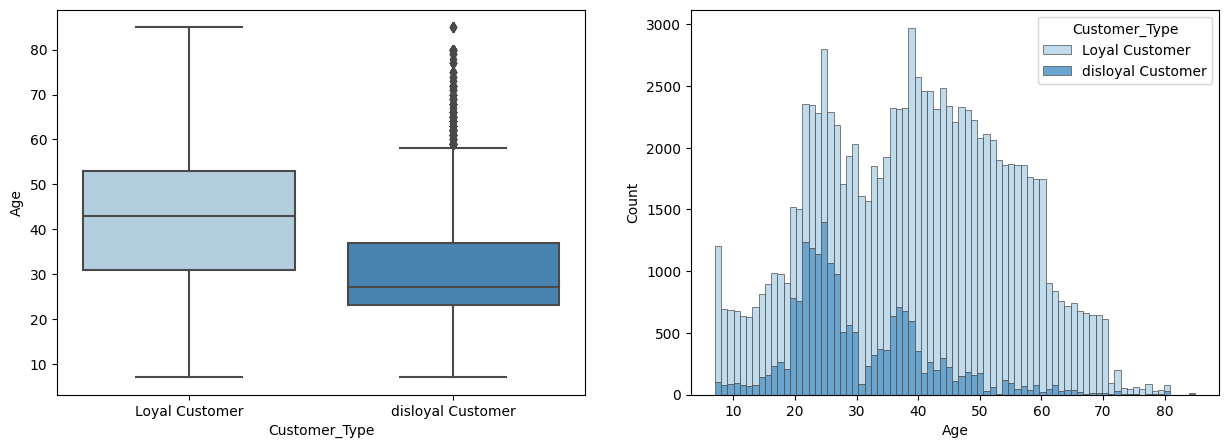

In [69]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Customer_Type", y = "Age", palette = "Blues", data = df, ax = ax[0])
sns.histplot(df, x = "Age", hue = "Customer_Type", multiple = "stack", palette = "Blues", edgecolor = ".3", linewidth = .5, ax = ax[1])

<AxesSubplot: xlabel='Age', ylabel='Count'>

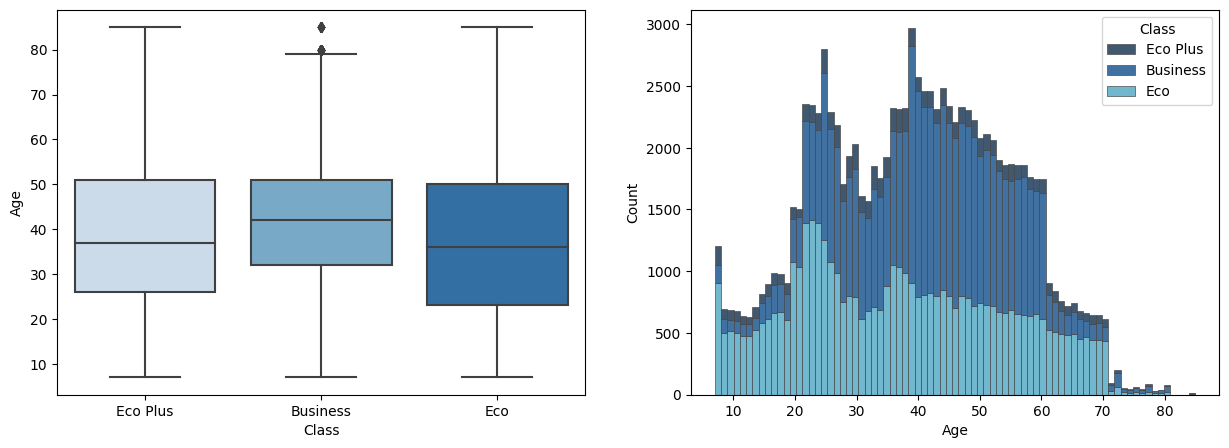

In [70]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Age", palette = "Blues", data = df, ax = ax[0])
sns.histplot(df, x = "Age", hue = "Class", multiple = "stack", palette = "ocean", edgecolor = ".3", linewidth = .5, ax = ax[1])

<AxesSubplot: xlabel='Age', ylabel='Count'>

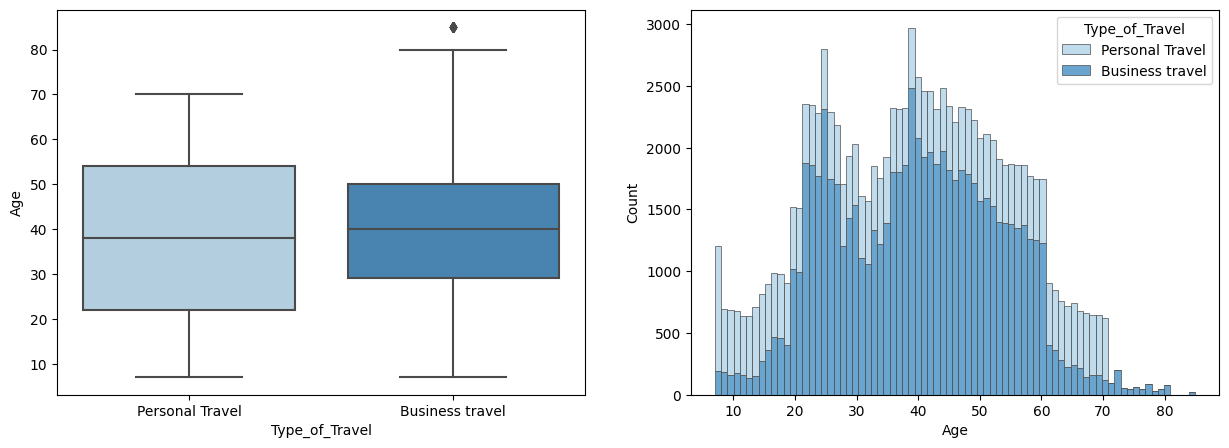

In [71]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Type_of_Travel", y = "Age", palette = "Blues", data = df, ax = ax[0])
sns.histplot(df, x = "Age", hue = "Type_of_Travel", multiple = "stack", palette = "Blues", edgecolor = ".3", linewidth = .5, ax = ax[1])

<AxesSubplot: xlabel='Flight_Distance', ylabel='Count'>

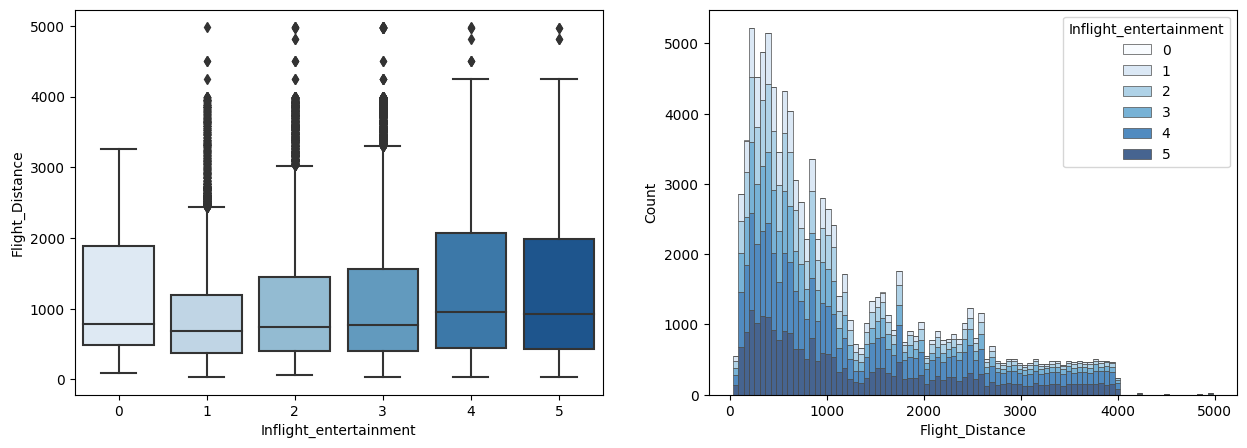

In [72]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Inflight_entertainment", y = "Flight_Distance", palette = "Blues", data = df, ax = ax[0])
sns.histplot(df, x = "Flight_Distance", hue = "Inflight_entertainment", multiple = "stack", palette = "Blues", edgecolor = ".3", linewidth = .5, ax = ax[1])

<AxesSubplot: xlabel='Flight_Distance', ylabel='Count'>

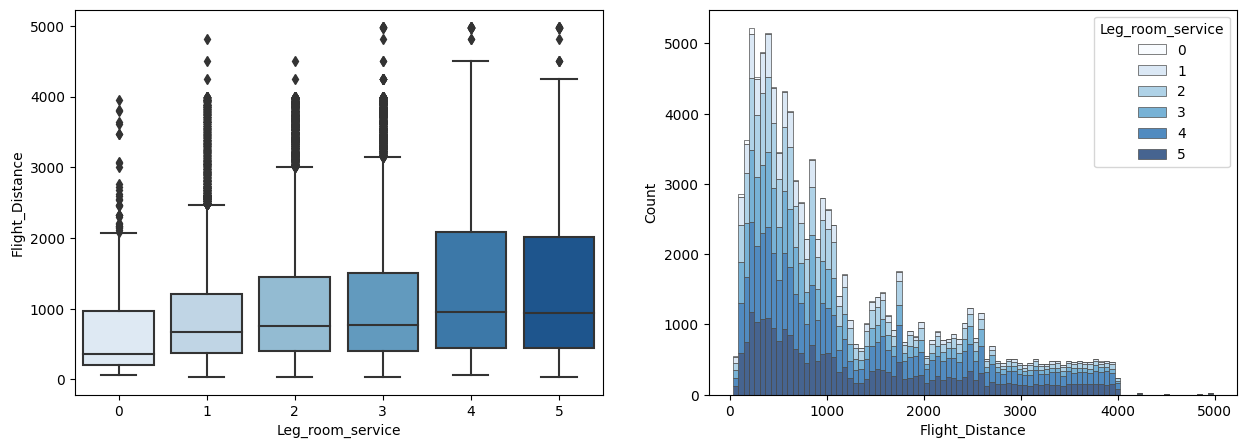

In [73]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Leg_room_service", y = "Flight_Distance", palette = "Blues", data = df, ax = ax[0])
sns.histplot(df, x = "Flight_Distance", hue = "Leg_room_service", multiple = "stack", palette = "Blues", edgecolor = ".3", linewidth = .5, ax = ax[1])

## Handling Categorical Vairables

#### Ordinal Encoding on 'Class'

In [74]:
df['Class'].unique().tolist()

['Eco Plus', 'Business', 'Eco']

In [75]:
def ordinalencoder(df_col, categories ):
    '''
    Ordinal Encoder function
    '''
    # Using pandas factorize method for ordinal data
    l_categories = pd.Categorical(df_col, categories=['Business','Eco Plus','Eco'], ordered=True)
    l_col = df_col.name
    # Factorizing the column data
    labels, unique = pd.factorize(l_categories, sort=True)
    df_col = labels
    display(Markdown('**Results:**'))
    print('Conversion applied to column: {}'.format(l_col))
    return df_col

In [76]:
categories=['Business','Eco Plus','Eco']

df['Class'] = ordinalencoder(df['Class'], categories)

**Results:**

Conversion applied to column: Class


In [77]:
df['Class'].unique().tolist()

[1, 0, 2]

In [78]:
df.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

#### One Hot Encoding

In [79]:
def one_hot_encoder(df, cat_cols ):
    '''
    One-Hot Encoder function
    '''
    print('Creating OHE features..\nOld df shape:{}'.format(df.shape))
    df = pd.get_dummies(df, columns=cat_cols)
    print('New df shape:{}'.format(df.shape))
    return df

In [80]:
cat_cols = ['Gender','Customer_Type','Type_of_Travel']
df = one_hot_encoder(df,cat_cols)

Creating OHE features..
Old df shape:(103904, 24)
New df shape:(103904, 27)


In [81]:
df.shape

(103904, 27)

In [82]:
df.columns

Index(['id', 'Age', 'Class', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction', 'Gender_Female', 'Gender_Male',
       'Customer_Type_Loyal Customer', 'Customer_Type_disloyal Customer',
       'Type_of_Travel_Business travel', 'Type_of_Travel_Personal Travel'],
      dtype='object')

## Check Correlations

<AxesSubplot: >

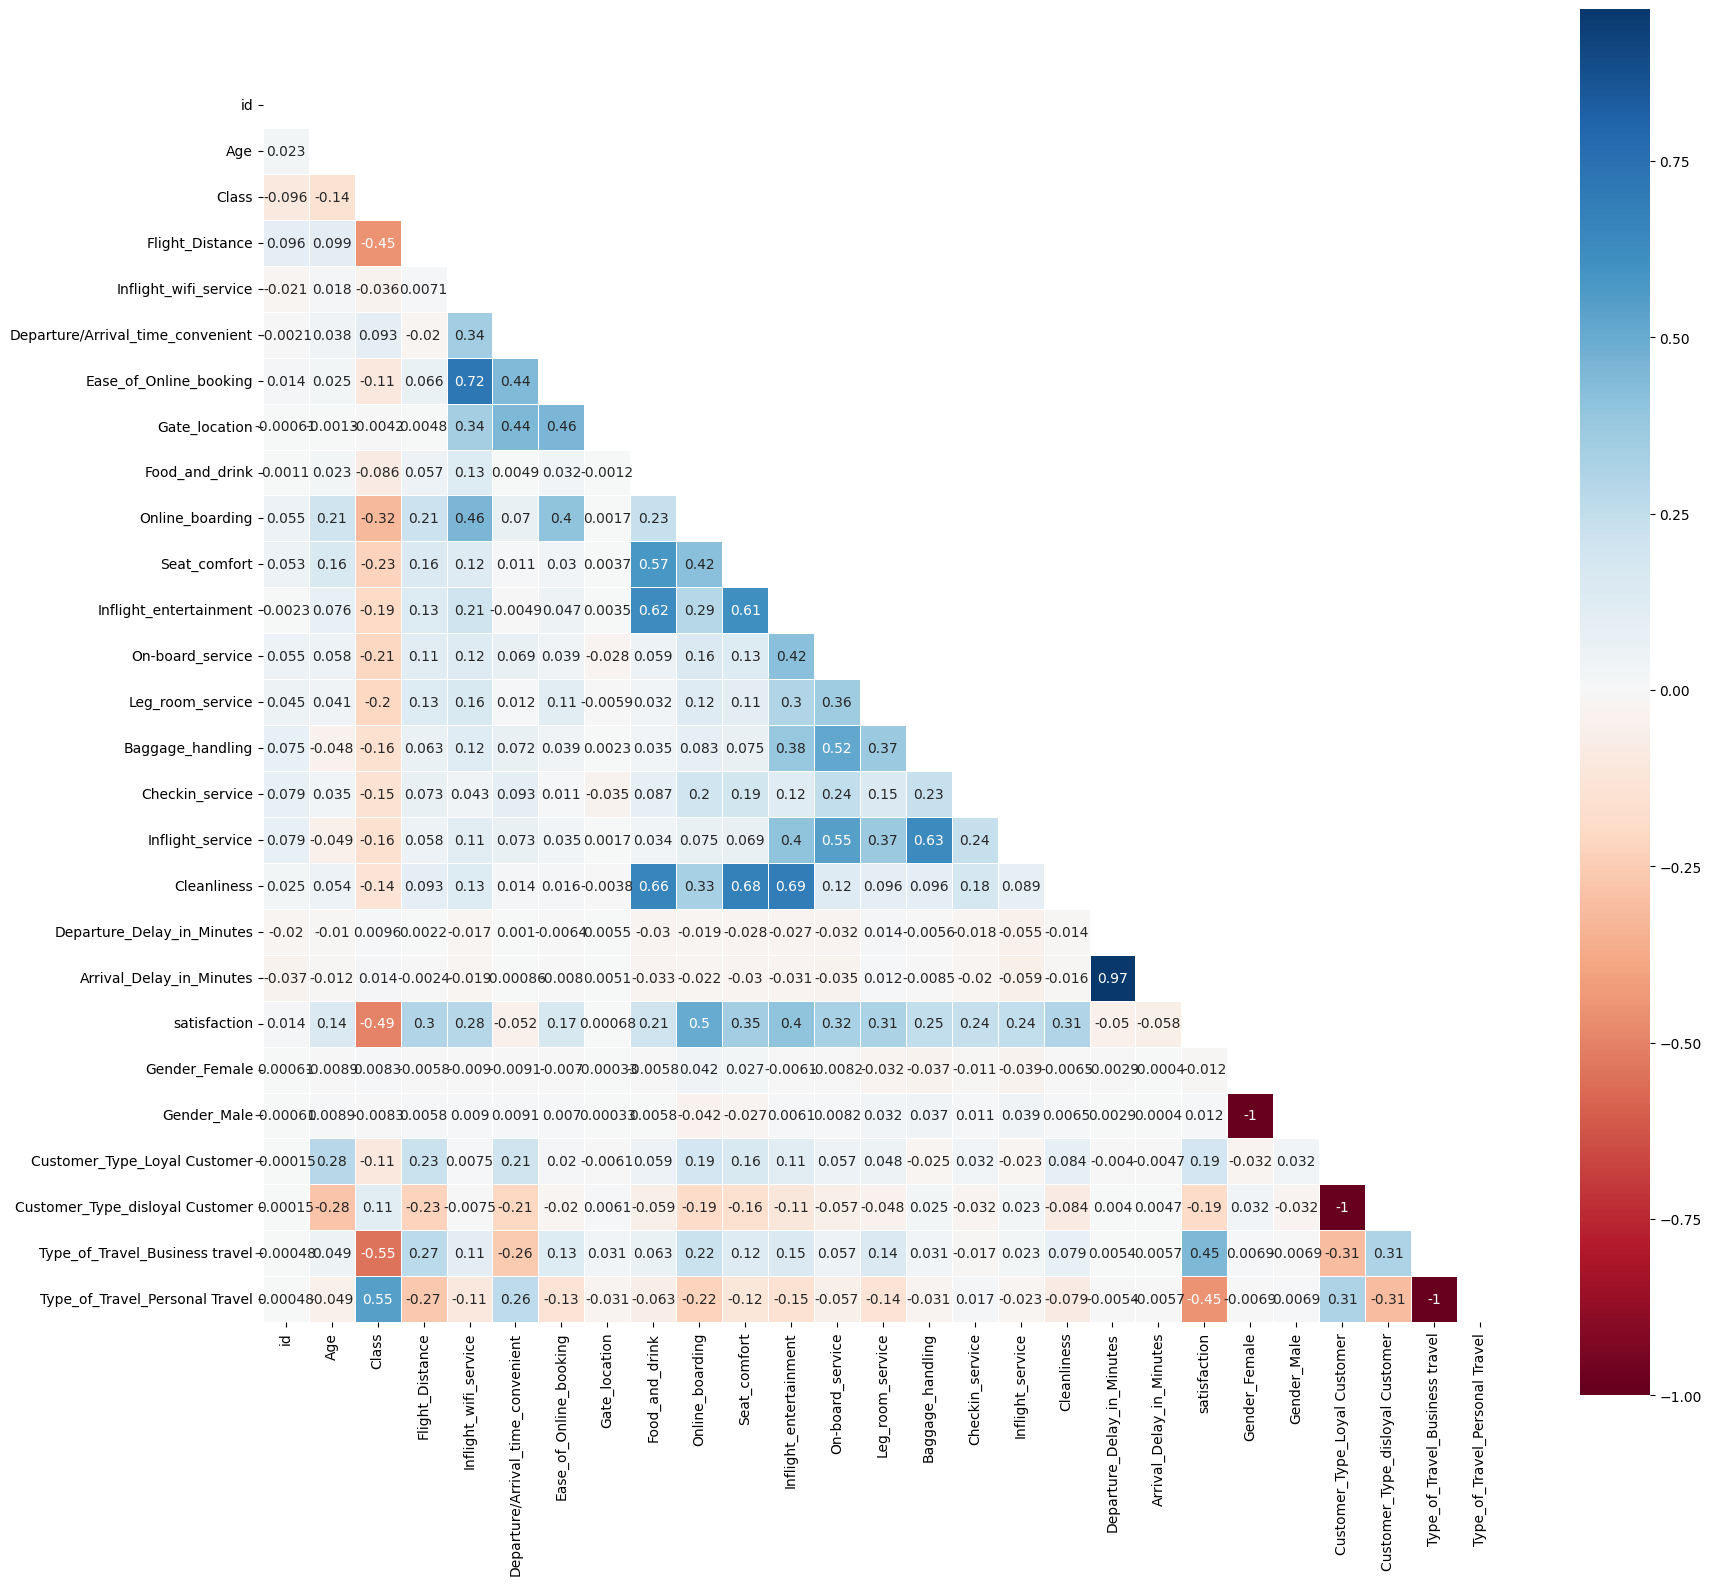

In [83]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap='RdBu', vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

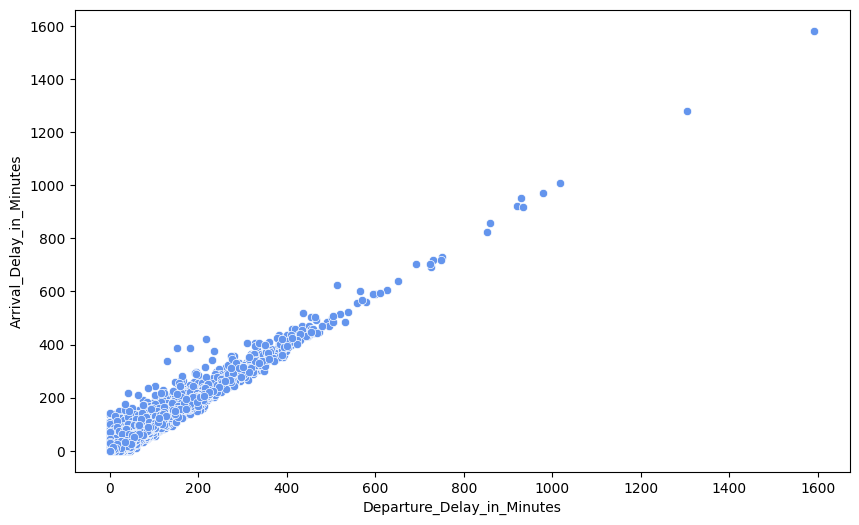

In [84]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Departure_Delay_in_Minutes', y = 'Arrival_Delay_in_Minutes', data = df, color = 'cornflowerblue')
plt.show()

#### The arrival delay and departure delay is highly corrlated, so we decided to remove the arrival delay.

In [85]:
df2 = df.drop(columns =['Gender_Female','Arrival_Delay_in_Minutes','Type_of_Travel_Personal Travel',
              'Customer_Type_disloyal Customer'])
df2.head(3)

,id,Age,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,satisfaction,Gender_Male,Customer_Type_Loyal Customer,Type_of_Travel_Business travel
0,70172,13,1,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,0,1,1,0
1,5047,25,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,0,1,0,1
2,110028,26,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,1,0,1,1


<AxesSubplot: >

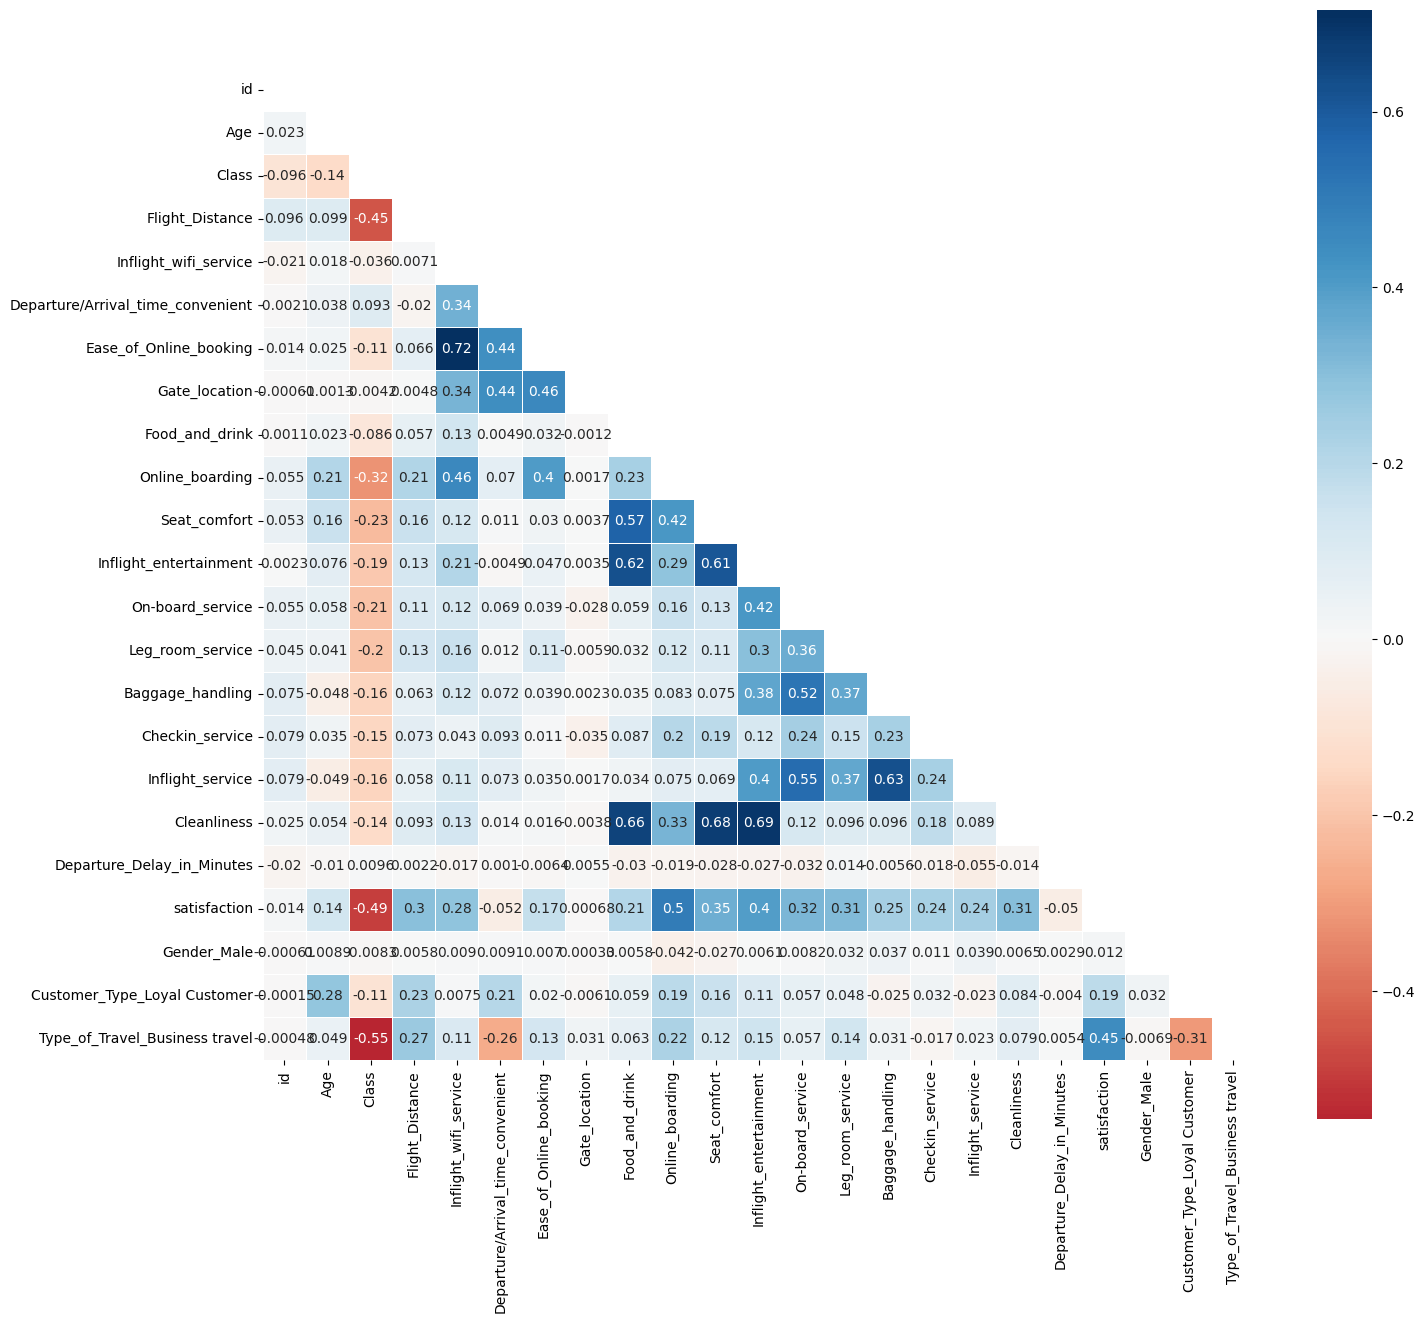

In [86]:
corr = df2.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corr, mask=mask, cmap='RdBu', vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

## Handling missing values

In [87]:
df2.isnull().sum().sort_values(ascending=False)

id                                   0
On-board_service                     0
Customer_Type_Loyal Customer         0
Gender_Male                          0
satisfaction                         0
Departure_Delay_in_Minutes           0
Cleanliness                          0
Inflight_service                     0
Checkin_service                      0
Baggage_handling                     0
Leg_room_service                     0
Inflight_entertainment               0
Age                                  0
Seat_comfort                         0
Online_boarding                      0
Food_and_drink                       0
Gate_location                        0
Ease_of_Online_booking               0
Departure/Arrival_time_convenient    0
Inflight_wifi_service                0
Flight_Distance                      0
Class                                0
Type_of_Travel_Business travel       0
dtype: int64

#### since there is no missing value, we pretend there are some age information missing in the dataset

In [88]:
len(df2.Age)

103904

In [89]:
df3 = df2.copy()

np.random.seed(0)
random_indices = np.random.choice(df3.index, size=100, replace=False)

df3.loc[random_indices, 'Age'] = np.nan

In [90]:
df3.isnull().sum().sort_values(ascending=False)

Age                                  100
id                                     0
On-board_service                       0
Customer_Type_Loyal Customer           0
Gender_Male                            0
satisfaction                           0
Departure_Delay_in_Minutes             0
Cleanliness                            0
Inflight_service                       0
Checkin_service                        0
Baggage_handling                       0
Leg_room_service                       0
Inflight_entertainment                 0
Seat_comfort                           0
Online_boarding                        0
Food_and_drink                         0
Gate_location                          0
Ease_of_Online_booking                 0
Departure/Arrival_time_convenient      0
Inflight_wifi_service                  0
Flight_Distance                        0
Class                                  0
Type_of_Travel_Business travel         0
dtype: int64

## SimpleImputer

In [91]:
null_rows_idx = df3.isnull().any(axis=1)

df3.loc[null_rows_idx].head(3)

,id,Age,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,satisfaction,Gender_Male,Customer_Type_Loyal Customer,Type_of_Travel_Business travel
216,13560,NaN,2,214,1,4,1,2,2,1,1,2,4,3,5,4,5,2,16,0,1,1,0
375,43935,NaN,1,174,5,3,5,3,5,5,5,5,5,1,5,3,5,5,0,1,0,1,1
1049,24138,NaN,0,302,2,1,1,1,5,4,4,2,2,2,2,1,2,2,2,0,0,1,1


In [92]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

df3_num = df3.select_dtypes(include=[np.number])

imputer.fit(df3_num)

SimpleImputer(strategy='median')

In [93]:
X_ = imputer.transform(df3_num)

df4 = pd.DataFrame(X_, columns=df3_num.columns,
                          index=df3_num.index)

In [94]:
df4.loc[null_rows_idx].head(3)

,id,Age,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,satisfaction,Gender_Male,Customer_Type_Loyal Customer,Type_of_Travel_Business travel
216,13560.0,40.0,2.0,214.0,1.0,4.0,1.0,2.0,2.0,1.0,1.0,2.0,4.0,3.0,5.0,4.0,5.0,2.0,16.0,0.0,1.0,1.0,0.0
375,43935.0,40.0,1.0,174.0,5.0,3.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,3.0,5.0,5.0,0.0,1.0,0.0,1.0,1.0
1049,24138.0,40.0,0.0,302.0,2.0,1.0,1.0,1.0,5.0,4.0,4.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,1.0,1.0


In [95]:
df4.head(3)

,id,Age,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,satisfaction,Gender_Male,Customer_Type_Loyal Customer,Type_of_Travel_Business travel
0,70172.0,13.0,1.0,460.0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,0.0,1.0,1.0,0.0
1,5047.0,25.0,0.0,235.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,1.0
2,110028.0,26.0,0.0,1142.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,1.0,0.0,1.0,1.0


## Remove Outliers

In [96]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X_)

In [97]:
df5 = df4.iloc[outlier_pred == 1]
df5.head(3)

,id,Age,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,satisfaction,Gender_Male,Customer_Type_Loyal Customer,Type_of_Travel_Business travel
2,110028.0,26.0,0.0,1142.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,1.0,0.0,1.0,1.0
4,119299.0,61.0,0.0,214.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,1.0,1.0,1.0,1.0
6,82113.0,47.0,2.0,1276.0,2.0,4.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,3.0,5.0,2.0,9.0,0.0,1.0,1.0,0.0


In [98]:
df5.shape

(42797, 23)

In [99]:
X = df5.drop("satisfaction", axis=1)
y = df5.satisfaction